In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import fcnoutlier as fno

%matplotlib inline

# Utils

# Eliptic Envelop for Groundstate

# datapoints 0.00 above 68976
# datapoints 0.10 above 68976
# datapoints 0.20 above 67734
# datapoints 0.30 above 41532
# datapoints 0.40 above 17193
# datapoints 0.50 above 7264
# datapoints 0.60 above 2942
# datapoints 0.70 above 1128
# datapoints 0.80 above 354
# datapoints 0.90 above 86
# datapoints 1.00 above 0


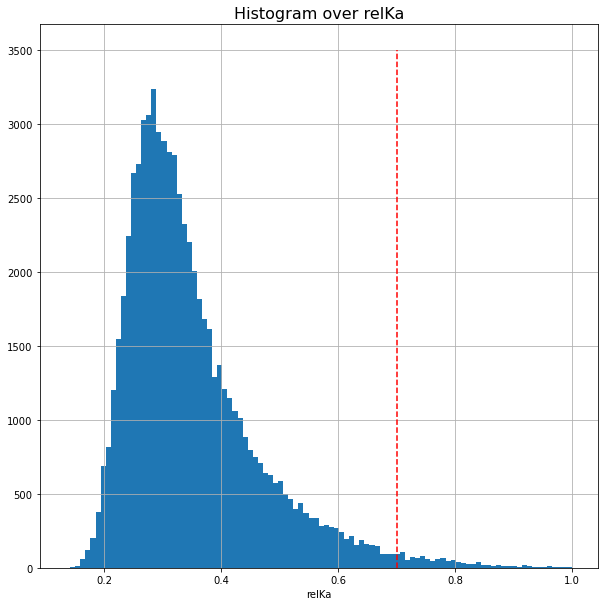

In [2]:
data = pd.read_csv('../data/groundstate/GSM1586782_ScrWT_Exd_14mer_cg_gs.txt')
fno.plot_hist(data)
fno.get_info(data)

In [3]:
fno.get_class(data)
data_sc = fno.get_normal(data)
train_data, test_data, y_test, tfbs = fno.get_testdata(data_sc)
perc = fno.get_prec(data_sc)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [4]:
cov = fno.get_elliptic_env(train_data,sf=0.95,per=perc)
y_pred, n_errors = fno.get_eval(cov,test_data,y_test)
data.loc[test_data[y_pred == -1].index,'Class']
fno.confusion_matrix(fno.get_labels(y_pred),y_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/covariance/_robust_covariance.py:647: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/covariance/_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-1887.040652870925669 > -1892.362808968278159). You may want to try with a higher value of support_fraction (current value: 0.950).
  warnings.warn("Determinant has increased; this should not happen: "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/covariance/_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-1886.810867944159554 > -1888.769836039496568). You may want to try with a higher value of support_fraction (current value: 0.950).
  warnings.warn("Determinant has increased; this should no

/opt/anaconda3/lib/python3.8/site-packages/sklearn/covariance/_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-1884.874606284901120 > -1886.139768809483940). You may want to try with a higher value of support_fraction (current value: 0.950).
  warnings.warn("Determinant has increased; this should not happen: "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/covariance/_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-1892.113065507302281 > -1893.754555915866831). You may want to try with a higher value of support_fraction (current value: 0.950).
  warnings.warn("Determinant has increased; this should not happen: "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/covariance/_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-1890.105764285228815 > -1893.06940803

/opt/anaconda3/lib/python3.8/site-packages/sklearn/covariance/_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-1886.586429259972192 > -1888.749333987464752). You may want to try with a higher value of support_fraction (current value: 0.950).
  warnings.warn("Determinant has increased; this should not happen: "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/covariance/_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-1886.926893088269026 > -1888.272960995612721). You may want to try with a higher value of support_fraction (current value: 0.950).
  warnings.warn("Determinant has increased; this should not happen: "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/covariance/_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-1889.367984098101488 > -1891.93610362

array([[13340,  1126],
       [  230,     2]])

In [5]:
y_pred = fno.get_labels(y_pred)
precision,recall, f1, support  = fno.get_results(y_pred,y_test)
print(f1)

0.0


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Envelop for Stiffness

In [ ]:
data = pd.read_csv('../data/stiffness/GSM1586782_ScrWT_Exd_14mer_cg_eigs.txt')
fno.plot_hist(data)
fno.get_info(data)

In [ ]:
fno.get_class(data)
data_sc = fno.get_normal(data)
train_data, test_data, y_test, tfbs = fno.get_testdata(data_sc)
perc = fno.get_prec(data_sc)

In [ ]:
cov = fno.get_elliptic_env((train_data,sf=0.95,per=perc)
y_pred, n_errors = fno.get_eval(cov,test_data,y_truth)
data.loc[test_data[y_pred == -1].index,'Class']
y_pred = fno.get_label(y_pred)

In [ ]:
precision,recall, f1, support  = fno.get_results(y_pred,y_test)
print(f1)

# Envelop for GS & Stiffness not done because n_samples > n_features**2 is not satisfied